# Phase 2 Project Notebook -- Jamie Dowat 

#### Project Goals:

* Develop at least 2 variables that are well-modeled with price.
* At least 3 polished visualizations, including a QQ plot

## Business Understanding

* Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
    * If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.


* What business problem(s) will this Data Science project solve for the organization?
    * What factors maximize a home's value?
    

* What problems are inside the scope of this project?
* What problems are outside the scope of this project?
* What data sources are available to us?
* What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
* Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## Data Understanding

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import scipy.stats as stats


%matplotlib inline

In [2]:
df = pd.read_csv('../src/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
len(df)

21597

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [174]:
df.corr().price

id               -0.017439
price             1.000000
bedrooms          0.309651
bathrooms         0.527350
sqft_living       0.704652
sqft_lot          0.087005
floors            0.258277
waterfront        0.276295
view              0.395766
condition         0.038037
grade             0.667224
sqft_above        0.609168
yr_built          0.053525
yr_renovated      0.122590
zipcode          -0.050212
lat               0.305126
long              0.021390
sqft_living15     0.582167
sqft_lot15        0.081243
price_per_sqft    0.554178
Name: price, dtype: float64

In [175]:
df.view.value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

### Grouping Data 

* .mode() -- the mode of the column
* .count() -- the count of the total number of entries in a column
* .std() -- the standard deviation for the column
* .var() -- the variance for the column
* .sum() -- the sum of all values in the column
* .cumsum() -- the cumulative sum, where each cell index contains the sum of all indices lower than, and including, itself.

##### New Column : Price_per_sqft

In [68]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [69]:
df[df['price_per_sqft']==df['price_per_sqft'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
19321,6021500970,4/7/2015,874950.0,2,1.0,1080,4000,1.0,0.0,0.0,...,1080,?,1940,NaN,98117,47.6902,-122.387,1530,4240,810.138889


In [70]:
df[df['price_per_sqft']==df['price_per_sqft'].min()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
18248,2891000610,12/11/2014,148900.0,4,1.75,1700,6000,1.0,0.0,0.0,...,1700,0.0,1967,0.0,98002,47.3252,-122.208,1280,6000,87.588235


###### New Column : Month Sold

In [176]:
df.date.dtype

dtype('O')

In [179]:
df['month_sold'] = df['date'].map(lambda x: int(x.split('/')[0]))

In [180]:
df['month_sold'].value_counts()

5     2161
4     1992
7     1978
6     1909
8     1749
3     1659
10    1655
9     1560
12    1320
11    1270
2     1101
1      867
Name: month_sold, dtype: int64

...

###### New Column: incorporated vs not incorporated

In [ ]:
df['incorporated'] = None
df['not_incorporated'] = None

In [119]:
df_grade_mean = df.groupby('grade').mean()

In [120]:
df_grade_count = df.groupby('grade').count()

In [122]:
df.groupby('grade').boxplot

<bound method boxplot_frame_groupby of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ff29bae2190>>

In [123]:
df.groupby('grade')['price'].agg([np.mean,np.median])

,mean,median
grade,,
3,2.620000e+05,262000.0
4,2.138020e+05,200000.0
5,2.505082e+05,230000.0
6,3.018118e+05,276250.0
7,4.026191e+05,375000.0
8,5.418716e+05,510000.0
9,7.770230e+05,725000.0
10,1.079123e+06,914327.0
11,1.485971e+06,1260000.0


In [131]:
grade_mean_median = df.groupby('grade')['price_per_sqft'].agg([np.mean,np.median])

In [138]:
df.groupby('grade')['price_per_sqft'].mean().values

array([503.84615385, 340.57435141, 283.77290819, 272.2696606 ,
       251.97221793, 257.60410014, 276.91238731, 308.62148772,
       339.27450059, 408.8380145 , 483.79669319])

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

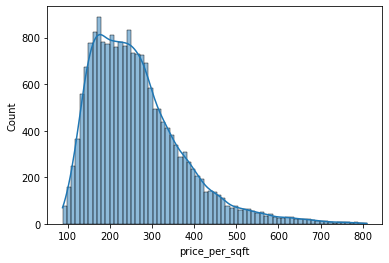

In [128]:
# Distribution of price per square foot
sns.histplot(df['price_per_sqft'], kde=True)

In [130]:
stats.normaltest(df['price_per_sqft'])

NormaltestResult(statistic=4036.606735669971, pvalue=0.0)

In [129]:
stats.skewtest(df['price_per_sqft'])

SkewtestResult(statistic=55.81108138548412, pvalue=0.0)

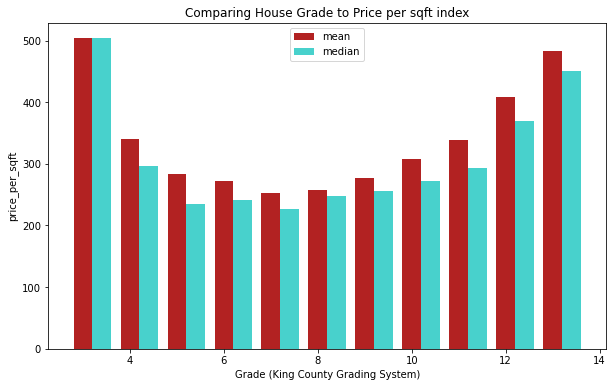

In [140]:
# Bar graph price_per_sqft per grade
fig, ax = plt.subplots(figsize=(10,6))

grade_means = df.groupby('grade')['price_per_sqft'].mean().values
grade_medians = df.groupby('grade')['price_per_sqft'].median().values

w = 0.4
bar1 = [i for i in range(3,14)]
bar2 = [i+w for i in bar1]

ax.bar(bar1, grade_means, width=w, color='firebrick', label='mean', align='center')
ax.bar(bar2, grade_medians, width=w, color='mediumturquoise', label='median', align='center')

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Grade (King County Grading System)')
ax.set_ylabel('price_per_sqft')
ax.set_title('Comparing House Grade to Price per sqft index')
ax.legend()

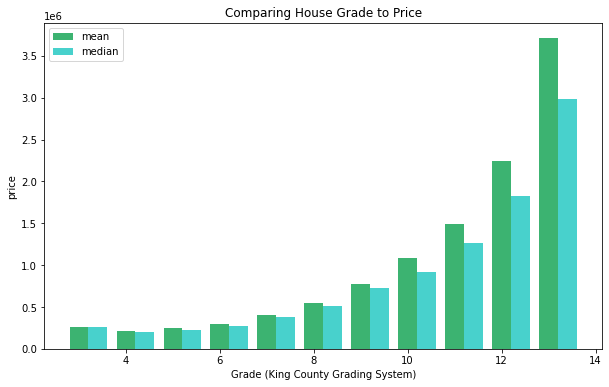

In [148]:
fig, ax = plt.subplots(figsize=(10,6))

grade_means = df.groupby('grade')['price'].mean().values
grade_medians = df.groupby('grade')['price'].median().values

w = 0.4
bar1 = [i for i in range(3,14)]
bar2 = [i+w for i in bar1]

ax.bar(bar1, grade_means, width=w, color='mediumseagreen', label='mean', align='center')
ax.bar(bar2, grade_medians, width=w, color='mediumturquoise', label='median', align='center')

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Grade (King County Grading System)')
ax.set_ylabel('price')
ax.set_title('Comparing House Grade to Price')
ax.legend()

In [125]:
df.groupby('grade')['price'].count()

grade
3        1
4       25
5      212
6     1810
7     7974
8     5409
9     2320
10    1018
11     357
12      82
13      13
Name: price, dtype: int64

In [115]:
df_grade.price

grade
3     2.620000e+05
4     2.138020e+05
5     2.505082e+05
6     3.018118e+05
7     4.026191e+05
8     5.418716e+05
9     7.770230e+05
10    1.079123e+06
11    1.485971e+06
12    2.249085e+06
13    3.710769e+06
Name: price, dtype: float64

In [73]:
# not a great distribution of condition qualities-- what does a '3' mean?
df.condition.value_counts()

3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64

In [74]:
df.yr_built.value_counts()

2014    496
2006    404
2005    395
2007    372
2003    372
       ... 
1901     27
1933     26
1902     24
1935     22
1934     19
Name: yr_built, Length: 116, dtype: int64

Text(0.5, 1.0, 'Year Built vs Average Price')

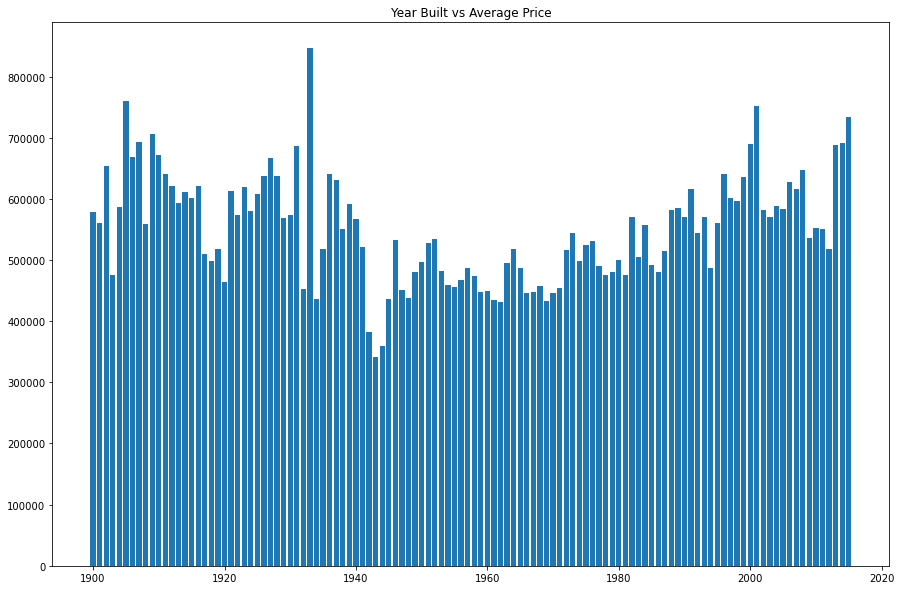

In [75]:
# Avg Sale Price vs Year built
avg_prices = [df['price'][df['yr_built']==year].mean() for year in years]
years = sorted(df.yr_built.value_counts().index)

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(years, avg_prices)
ax.set_title('Year Built vs Average Price')

<AxesSubplot:xlabel='price', ylabel='Count'>

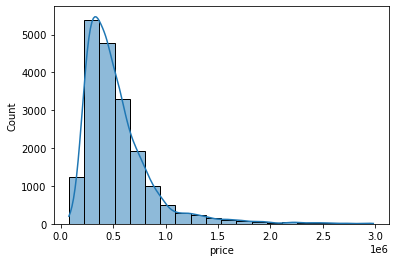

In [76]:
# Distribution of prices
sns.histplot(df['price'][df['price']<3000000], bins=20, kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff27f9d7730>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff27f9d7df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff27f9d73d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff27f9e44f0>],
 'fliers': [],
 'means': []}

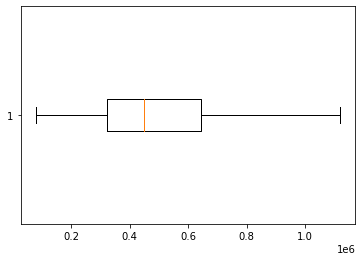

In [151]:
# Prices Boxplot

plt.boxplot(df['price'], showfliers=False, vert=False)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

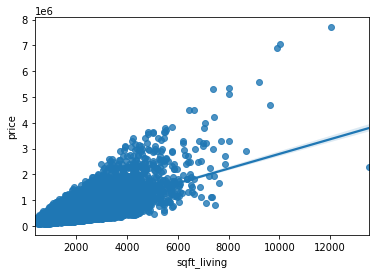

In [77]:
# Distribution of sqft_living and price
sns.regplot(x=df.sqft_living, y=df.price)

In [146]:
mod1 = df[['price', 'sqft_living', 'sqft_living15','price_per_sqft', 'grade', 'bathrooms']]

In [105]:
formula = 'price~sqft_living'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:05   Log-Likelihood:            -2.6723e+05
No. Observations:               19221   AIC:                         5.345e+05
Df Residuals:                   19219   BIC:                         5.345e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.045e+04   4703.746    -10.726      0.000   -5.97e+04   -4.12e+04
sqft_living   284.3280      2.065    137.675      0.000     280.280     288.376
==============================================================================
Omnibus:                    13337.882   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507333.623
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      27.511   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### HIGHEST RUNNING R^2 

In [147]:
formula = 'price~bathrooms+sqft_living+grade+sqft_living15'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5621.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:52:43   Log-Likelihood:            -2.6638e+05
No. Observations:               19221   AIC:                         5.328e+05
Df Residuals:                   19216   BIC:                         5.328e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         -6e+05   1.43e+04    -41.938      0.000   -6.28e+05   -5.72e+05
bathrooms     -3.876e+04   3715.458    -10.431      0.000    -4.6e+04   -3.15e+04
sqft_living     205.4581      3.978     51.651      0.000     197.661     213.255
grade          1.021e+05   2605.484     39.174      0.000     9.7e+04    1.07e+05
sqft_living15     6.9775      4.309      1.619      0.105      -1.468      15.423
==============================================================================
Omnibus:                    15316.414   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           957067.715
Skew:                           3.363   Prob(JB):                         0.00
Kurtosis:                      36.909   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
formula = 'price~bathrooms+sqft_living'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9480.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:21:20   Log-Likelihood:            -2.6723e+05
No. Observations:               19221   AIC:                         5.345e+05
Df Residuals:                   19218   BIC:                         5.345e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.536e+04   5600.191     -8.100      0.000   -5.63e+04   -3.44e+04
bathrooms   -6338.0838   3784.283     -1.675      0.094   -1.38e+04    1079.441
sqft_living   288.3269      3.157     91.335      0.000     282.139     294.514
==============================================================================
Omnibus:                    13317.236   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           504847.241
Skew:                           2.854   Prob(JB):                         0.00
Kurtosis:                      27.450   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
formula = 'price~grade'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.542e+04
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:20:05   Log-Likelihood:            -2.6816e+05
No. Observations:               19221   AIC:                         5.363e+05
Df Residuals:                   19219   BIC:                         5.363e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.076e+06   1.32e+04    -81.656      0.000    -1.1e+06   -1.05e+06
grade       2.112e+05   1700.721    124.184      0.000    2.08e+05    2.15e+05
==============================================================================
Omnibus:                    18066.616   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1965034.624
Skew:                           4.209   Prob(JB):                         0.00
Kurtosis:                      51.813   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
formula = 'price~grade+sqft_living'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:29:40   Log-Likelihood:            -2.6644e+05
No. Observations:               19221   AIC:                         5.329e+05
Df Residuals:                   19218   BIC:                         5.329e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.023e+05   1.43e+04    -42.108      0.000    -6.3e+05   -5.74e+05
grade        9.798e+04   2409.764     40.658      0.000    9.33e+04    1.03e+05
sqft_living   188.9021      3.072     61.495      0.000     182.881     194.923
==============================================================================
Omnibus:                    15295.194   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           937611.533
Skew:                           3.362   Prob(JB):                         0.00
Kurtosis:                      36.549   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
formula = 'price_per_sqft~grade'
sqft_mod = ols(formula=formula, data=mod1).fit()
sqft_summ = sqft_mod.summary()
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         price_per_sqft   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     302.8
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           2.69e-67
Time:                        12:19:19   Log-Likelihood:            -1.1752e+05
No. Observations:               19221   AIC:                         2.350e+05
Df Residuals:                   19219   BIC:                         2.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    174.9419      5.202     33.632      0.000     164.746     185.138
grade         11.6777      0.671     17.400      0.000      10.362      12.993
==============================================================================
Omnibus:                     4128.860   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8661.648
Skew:                           1.263   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
df[df['price']>3000000].max()

id                9808700762
date                9/4/2014
price                7.7e+06
bedrooms                   8
bathrooms                  8
sqft_living            12050
sqft_lot               56609
floors                   3.5
waterfront                 1
view                       4
condition                  5
grade                     13
sqft_above              8860
sqft_basement              ?
yr_built                2014
yr_renovated            2010
zipcode                98199
lat                  47.7493
long                -122.077
sqft_living15           5070
sqft_lot15             51330
price_per_sqft       798.122
dtype: object

###### Waterfront views? 

In [81]:
df_wf = df
df_wf.dropna(inplace=True, subset=['waterfront'])

In [82]:
df_wf.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                57
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3412
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price_per_sqft       0
dtype: int64

In [83]:
df_wf.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [84]:
df_wf['price'][df_wf['waterfront']==1.0].mean()

1717214.7260273972

In [85]:
df_wf['price'][df_wf['waterfront']==0.0].mean()

532641.9866841416

In [92]:
len(df[df['price']>3000000])

44

In [86]:
df[df['price']>3000000].max()

id                9808700762
date                9/4/2014
price                7.7e+06
bedrooms                   8
bathrooms                  8
sqft_living            12050
sqft_lot               56609
floors                   3.5
waterfront                 1
view                       4
condition                  5
grade                     13
sqft_above              8860
sqft_basement              ?
yr_built                2014
yr_renovated            2010
zipcode                98199
lat                  47.7493
long                -122.077
sqft_living15           5070
sqft_lot15             51330
price_per_sqft       798.122
dtype: object

In [87]:
df_wf['price'][df_wf['waterfront']==1].max()

7060000.0

Text(0.5, 1.0, 'Comparing CDFs-- price distribution')

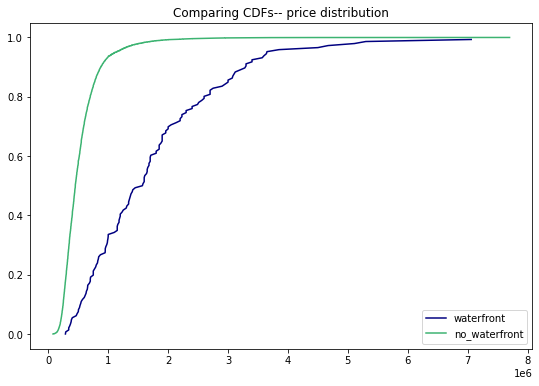

In [88]:
waterfront = df_wf['price'][df_wf['waterfront']==1]
no_waterfront = df_wf['price'][df_wf['waterfront']==0]

plt.figure(figsize=(9, 6))
plt.plot(np.sort(waterfront), np.linspace(0, 1, len(waterfront), endpoint=False), color='navy')
plt.plot(np.sort(no_waterfront), np.linspace(0, 1, len(no_waterfront), endpoint=False), color='mediumseagreen')

plt.legend(['waterfront', 'no_waterfront'])
plt.title('Comparing CDFs-- price distribution')

Text(0.5, 1.0, 'Comparing CDFs-- price distribution')

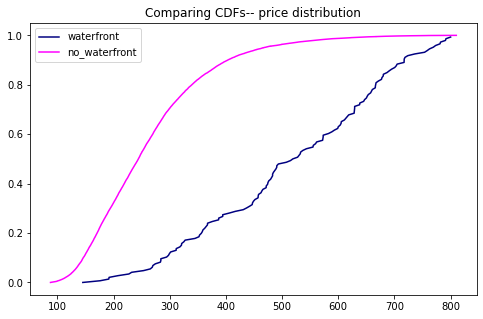

In [153]:
waterfront = df_wf['price_per_sqft'][df_wf['waterfront']==1]
no_waterfront = df_wf['price_per_sqft'][df_wf['waterfront']==0]

plt.figure(figsize=(8, 5))
plt.plot(np.sort(waterfront), np.linspace(0, 1, len(waterfront), endpoint=False), color='navy')
plt.plot(np.sort(no_waterfront), np.linspace(0, 1, len(no_waterfront), endpoint=False), color='magenta')

plt.legend(['waterfront', 'no_waterfront'])
plt.title('Comparing CDFs-- price distribution')

# why is one smooth and one isn't?

(array([9.54823379e-04, 3.32011534e-03, 4.22415024e-03, 4.04856722e-03,
        3.91941937e-03, 3.39267031e-03, 2.34787877e-03, 1.70213955e-03,
        1.28712513e-03, 7.80691456e-04, 5.34004565e-04, 3.48263847e-04,
        2.59746786e-04, 1.98800612e-04, 1.27696744e-04, 9.14192597e-05,
        6.82016700e-05, 3.19241859e-05, 3.04730866e-05, 1.16087949e-05]),
 array([ 87.58823529, 123.71576797, 159.84330065, 195.97083333,
        232.09836601, 268.22589869, 304.35343137, 340.48096405,
        376.60849673, 412.73602941, 448.86356209, 484.99109477,
        521.11862745, 557.24616013, 593.37369281, 629.50122549,
        665.62875817, 701.75629085, 737.88382353, 774.01135621,
        810.13888889]),
 <BarContainer object of 20 artists>)

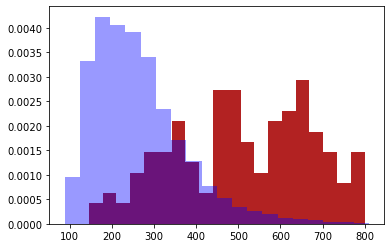

In [160]:
plt.hist(waterfront, bins=20, color='firebrick', density=True)
plt.hist(no_waterfront, bins=20, color='blue', density=True, alpha=.4)

In [166]:
df['price'].dtype

dtype('float64')

In [173]:
df[df['condition']<3]['price'].max()

2560000.0

In [169]:
df['yr_renovated'][df['yr_renovated']>=2000].value_counts()

2014.0    64
2013.0    29
2005.0    27
2000.0    25
2007.0    24
2003.0    24
2009.0    19
2006.0    18
2004.0    18
2008.0    15
2002.0    15
2010.0    14
2001.0    14
2015.0    13
2011.0     7
2012.0     7
Name: yr_renovated, dtype: int64

In [34]:
df[df['price']>3000000].max()

id               9808700762
date               9/4/2014
price               7.7e+06
bedrooms                  8
bathrooms                 8
sqft_living           12050
sqft_lot              56609
floors                  3.5
waterfront                1
view                      4
condition                 5
grade                    13
sqft_above             8860
sqft_basement             ?
yr_built               2014
yr_renovated           2010
zipcode               98199
lat                 47.7493
long               -122.077
sqft_living15          5070
sqft_lot15            51330
dtype: object

## Data Prep

## Modeling